## What are Convolutions?

In this lab we'll explore what they are and how they work.Together with convolutions, you'll use something called 'Pooling', which compresses your image, further emphasising the features. You'll also see how pooling works in this lab. 

Obs: This content was adapted from https://codelabs.developers.google.com/codelabs/tensorflow-lab3-convolutions/#0

Generating convolutions is very simple -- you simply scan every pixel in the image and then look at it's neighboring pixels. You multiply out the values of these pixels by the equivalent weights in a filter. 

So, for example, consider this:

![Convolution on image](https://storage.googleapis.com/laurencemoroney-blog.appspot.com/MLColabImages/lab3-fig1.png)

In this case a 3x3 Convolution is specified.

The current pixel value is 192, but you can calculate the new one by looking at the neighbor values, and multiplying them out by the values specified in the filter, and making the new pixel value the final amount.



Let's explore how convolutions work by creating a basic convolution on a 2D Grey Scale image. First we can load the image by taking the 'ascent' image from scipy. It's a nice, built-in picture with lots of angles and lines. 

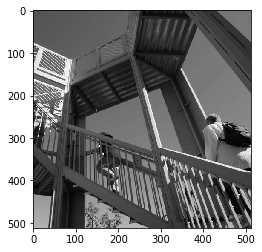

In [1]:
import cv2
import numpy as np
from scipy import misc
import matplotlib.pyplot as plt

i = misc.ascent()
plt.grid(False)
plt.gray()
plt.imshow(i)
plt.show()

In [2]:
i_transformed = np.copy(i)
size_x = i_transformed.shape[0]
size_y = i_transformed.shape[1]

# This filter detects edges nicely
# It creates a convolution that only passes through sharp edges and straight
# lines.

#Experiment with different values for fun effects.
#filter = [ [0, 1, 0], [1, -4, 1], [0, 1, 0]]

# A couple more filters to try for fun!
filter = [ [-1, -2, -1], [0, 0, 0], [1, 2, 1]]
#filter = [ [-1, 0, 1], [-2, 0, 2], [-1, 0, 1]]

# If all the digits in the filter don't add up to 0 or 1, you 
# should probably do a weight to get it to do so
# so, for example, if your weights are 1,1,1 1,2,1 1,1,1
# They add up to 10, so you would set a weight of .1 if you want to normalize them
weight  = 1

In [3]:
# Now let's create a convolution. We will iterate over the image, leaving a 1 pixel margin, and multiply out 
# each of the neighbors of the current pixel by the value defined in the filter. 

for x in range(1,size_x-1):
  for y in range(1,size_y-1):
      convolution = 0.0
      convolution = convolution + (i[x - 1, y-1] * filter[0][0])
      convolution = convolution + (i[x, y-1] * filter[0][1])
      convolution = convolution + (i[x + 1, y-1] * filter[0][2])
      convolution = convolution + (i[x-1, y] * filter[1][0])
      convolution = convolution + (i[x, y] * filter[1][1])
      convolution = convolution + (i[x+1, y] * filter[1][2])
      convolution = convolution + (i[x-1, y+1] * filter[2][0])
      convolution = convolution + (i[x, y+1] * filter[2][1])
      convolution = convolution + (i[x+1, y+1] * filter[2][2])
      convolution = convolution * weight
      if(convolution<0):
        convolution=0
      if(convolution>255):
        convolution=255
      i_transformed[x, y] = convolution

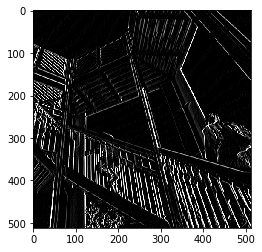

In [4]:
# Plot the image. Note the size of the axes -- they are 512 by 512
plt.gray()
plt.grid(False)
plt.imshow(i_transformed)
#plt.axis('off')
plt.show()   

So, consider the following filter values, and their impact on the image.

Using -1,0,1,-2,0,2,-1,0,1 gives us a very strong set of vertical lines:

![Detecting vertical lines filter](https://storage.googleapis.com/laurencemoroney-blog.appspot.com/MLColabImages/lab3-fig2.png)

Using -1, -2, -1, 0, 0, 0, 1, 2, 1 gives us horizontal lines:

![Detecting horizontal lines](https://storage.googleapis.com/laurencemoroney-blog.appspot.com/MLColabImages/lab3-fig3.png)

Explore different values for yourself! 

## Pooling

As well as using convolutions, pooling helps us greatly in detecting features. The goal is to reduce the overall amount of information in an image, while maintaining the features that are detected as present. 

There are a number of different types of pooling, but for this lab we'll use one called MAX pooling. 

 The idea here is to iterate over the image, and look at the pixel and it's immediate neighbors to the right, beneath, and right-beneath. Take the largest (hence the name MAX pooling) of them and load it into the new image. Thus the new image will be 1/4 the size of the old -- with the dimensions on X and Y being halved by this process. You'll see that the features get maintained despite this compression!

![Max Pooling](https://storage.googleapis.com/laurencemoroney-blog.appspot.com/MLColabImages/lab3-fig4.png)

This code will show a (2, 2) pooling.Run it to see the output, and you'll see that while the image is 1/4 the size of the original, the extracted features are maintained!



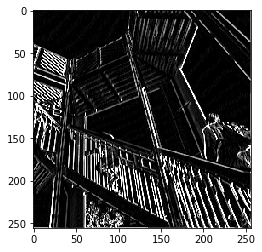

In [5]:
# This code will show a (2, 2) pooling.Run it to see the output, and you'll see 
# that while the image is 1/4 the size of the original, the extracted features are maintained!
new_x = int(size_x/2)
new_y = int(size_y/2)
newImage = np.zeros((new_x, new_y))
for x in range(0, size_x, 2):
  for y in range(0, size_y, 2):
    pixels = []
    pixels.append(i_transformed[x, y])
    pixels.append(i_transformed[x+1, y])
    pixels.append(i_transformed[x, y+1])
    pixels.append(i_transformed[x+1, y+1])
    pixels.sort(reverse=True)
    newImage[int(x/2),int(y/2)] = pixels[0]

# Plot the image. Note the size of the axes -- now 256 pixels instead of 512
plt.gray()
plt.grid(False)
plt.imshow(newImage)
plt.show()      
    
    